<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [2]:
!pip install tqdm

    100% |████████████████████████████████| 51kB 814kB/s ta 0:00:01


In [141]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Семинарская часть

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [142]:
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import KFold

/home/balya/TechnoSphere/py-virt-env/local/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [143]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

In [144]:
model = SVC()
x,y = generate_linear()
param_grid = {'C': [1, 2],
             'kernel': ['linear']}
cv = KFold(n_splits=10, shuffle=True, random_state=123)
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    scoring='accuracy', 
                    n_jobs=-1,
                    cv=cv.get_n_splits(x, y))
grid.fit(x, y)

Generating 'Linearly-separated' data set


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'kernel': ['linear'], 'C': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [145]:
grid.best_score_

0.92

In [146]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None
    
    model = SVC()
    param_grid = [{'C': [0.1, 1, 10, 100, 1000, 10000],
                 'kernel': ['linear']},
                {'C': [0.1, 1, 10, 100, 1000, 10000],
                 'kernel': ['poly'],
                 'degree': [2, 3],
                 'gamma': ['auto']},
                {'C': [0.1, 1, 10, 100, 1000, 10000],
                 'kernel': ['rbf'],
                 'gamma': ['auto']}]
    
    cv = KFold(n_splits=10, shuffle=True, random_state=123)
    grid = GridSearchCV(estimator=model, 
                        param_grid=param_grid, 
                        scoring='accuracy', 
                        n_jobs=-1,
                        cv=cv.get_n_splits(x, y), verbose=1)
    grid.fit(x, y)
    
    best_model = grid.best_estimator_
    best_accuracy = grid.best_score_
    
    best_model.fit(x, y)
    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [147]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.8s finished


Best model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.920000
Plotting data set points
Plotting decision region


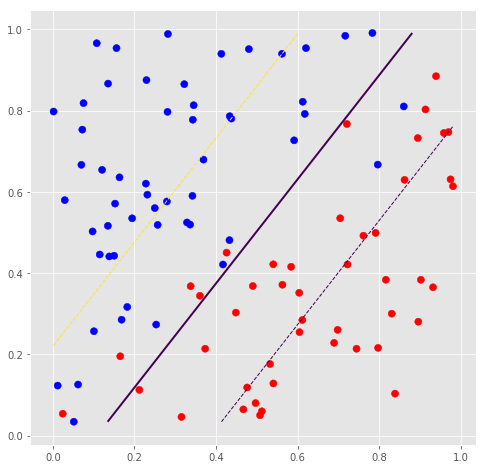

In [148]:
#x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Concentric circles' data set
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   54.8s finished


Best model SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.970000
Plotting data set points
Plotting decision region


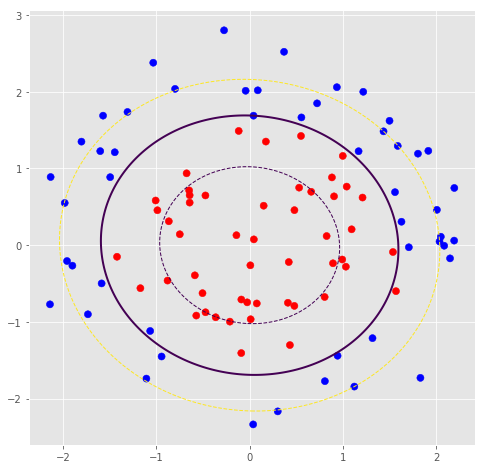

In [149]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = np.zeros((size, 2))
    x[:size/2, 0] = sigma * np.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * np.random.randn(size/2) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(size/2, dtype=int), np.ones(size/2, dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Sinus-separated' data set
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 153 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 100.6min finished


Best model SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.970000
Plotting data set points
Plotting decision region


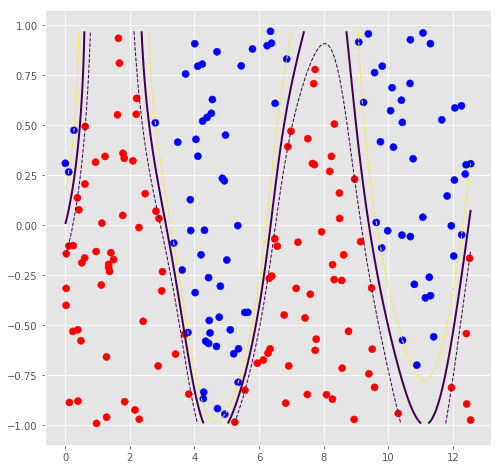

In [150]:
def generate_sin(size=200):
    print "Generating 'Sinus-separated' data set"

    x = np.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * np.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = np.zeros(size, dtype=int)
    y[x[:, 1] > np.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [74]:
df = pd.read_csv('data/titanium.csv')
df.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


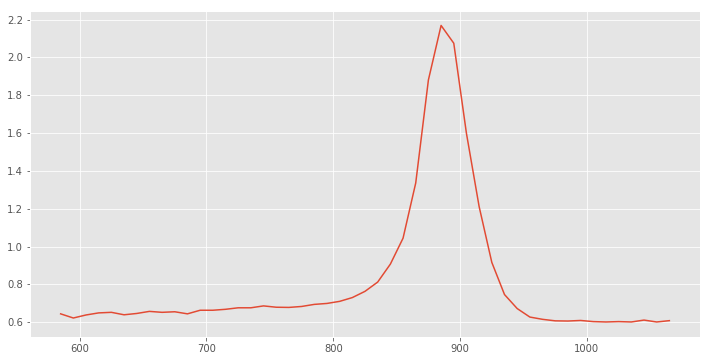

In [75]:
plt.plot(df.x, df.y)

In [76]:
X = df.x.values.reshape(-1, 1)
X = (X - X.mean()) / X.std()
y = df.y.values

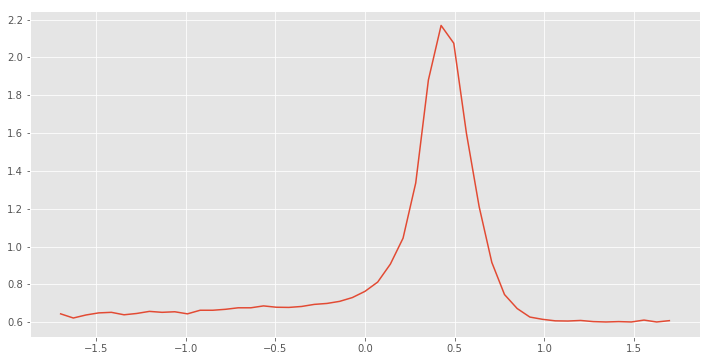

In [77]:
plt.plot(X, y)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [78]:
from sklearn.metrics import mean_absolute_error

In [79]:
C = np.logspace(-2, 2, 10)

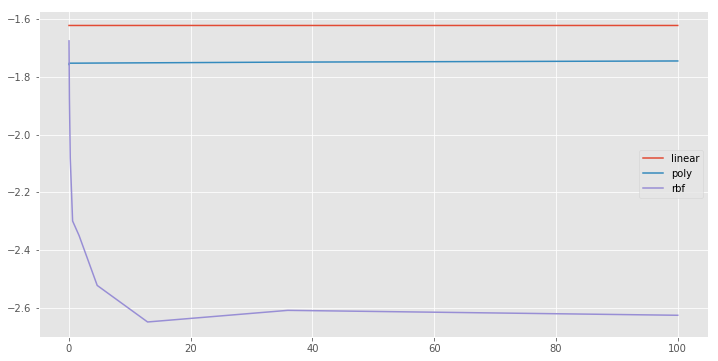

In [80]:
errors_lin = []
errors_poly = []
errors_rbf = []

best_min_err_lin = best_min_err_poly = best_min_err_rbf = {'minErr': 10**10, 'C': None, 'y_pred': None}
for c in C:
    param_grid = [
        {
            'C': [c],
            'kernel': ['linear'], 
            'epsilon': [0.1]
        },
        {
            'C': [c],
            'kernel': ['poly'],
            'degree': [3],
            'gamma': [6], 
            'coef0': [1],
            'epsilon': [0.1]        
        },
        {
            'C': [c],
            'kernel': ['rbf'],
            'gamma': [6], 
            'coef0': [1],
            'epsilon': [0.1]        
        }
    ]
    modelLinearKer = SVR(kernel='linear', epsilon=.1, C=c)
    modelPolyKer = SVR(kernel='poly', degree=3, gamma=6, coef0=1, epsilon=.1, C=c)
    modelRbfKer = SVR(kernel='rbf', gamma=6, coef0=1, epsilon=.1, C=c)
    modelLinearKer.fit(X, y)
    modelPolyKer.fit(X, y)
    modelRbfKer.fit(X, y)
    y_pred_lin = modelLinearKer.predict(X)
    y_pred_poly = modelPolyKer.predict(X)
    y_pred_rbf = modelRbfKer.predict(X)
    
    scor_lin = mean_absolute_error(y, y_pred_lin)
    scor_poly = mean_absolute_error(y, y_pred_poly)
    scor_rbf = mean_absolute_error(y, y_pred_rbf)
    errors_lin.append(scor_lin)
    errors_poly.append(scor_poly)
    errors_rbf.append(scor_rbf)
    
    if best_min_err_lin['minErr'] > scor_lin:
        best_min_err_lin['minErr'] = scor_lin
        best_min_err_lin['C'] = c
        best_min_err_lin['y_pred'] = y_pred_lin
    if best_min_err_poly['minErr'] > scor_poly:
        best_min_err_poly['minErr'] = scor_poly
        best_min_err_poly['C'] = c
        best_min_err_poly['y_pred'] = y_pred_poly
    if best_min_err_rbf['minErr'] > scor_rbf:
        best_min_err_rbf['minErr'] = scor_rbf
        best_min_err_rbf['C'] = c
        best_min_err_rbf['y_pred'] = y_pred_rbf
        
plt.plot(C, np.log(errors_lin), label='linear')
plt.plot(C, np.log(errors_poly), label='poly')
plt.plot(C, np.log(errors_rbf), label='rbf')
plt.legend()

12.9154966501 12.9154966501 12.9154966501


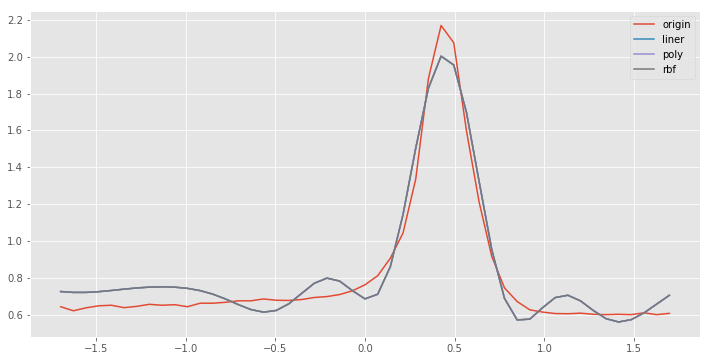

In [81]:
print best_min_err_lin['C'], best_min_err_poly['C'], best_min_err_rbf['C']
plt.plot(X, y, label='origin')
plt.plot(X, best_min_err_lin['y_pred'], label='liner')
plt.plot(X, best_min_err_poly['y_pred'], label='poly')
plt.plot(X, best_min_err_rbf['y_pred'], label='rbf')
plt.legend()

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [83]:
text_es = pd.read_table('./data/war_and_peace_es.txt', sep='\n', header=None, names=['word'])
text_es.head()

,word
0,guerra
1,pace
2,lev
3,nicoevic
4,tolstj


In [84]:
text_en = pd.read_table('./data/war_and_peace_en.txt', sep='\n', header=None, names=['word'])
text_en.head()

,word
0,war
1,and
2,peace
3,leo
4,tolstoy


In [85]:
text_en['label'] = 0
text_es['label'] = 1

In [86]:
text_en.head()

,word,label
0,war,0
1,and,0
2,peace,0
3,leo,0
4,tolstoy,0


In [87]:
tmp = pd.concat([text_en, text_es])
tmp.sample(10)

,word,label
4859,era,1
1096,giorno,1
1072,societ,1
4288,gli,1
393,figlia,1
560,non,1
2789,the,0
2908,uno,1
1901,was,0
2287,fosse,1


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [88]:
from sklearn.cross_validation import train_test_split

In [89]:
RND_SEED = 123

In [90]:
tmp.shape

(11403, 2)

In [91]:
df = tmp.sample(2000, random_state=RND_SEED).reset_index(drop=True)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    df.index.values, 
    df.iloc[:, -1].values, 
    train_size=0.6, 
    random_state=RND_SEED)

In [106]:
df.head()

,word,label
0,contrasto,1
1,suo,1
2,her,0
3,her,0
4,bors,1


## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [107]:
from Levenshtein import distance

In [108]:
X_train

array([1180, 1515, 1098, ..., 1406, 1389, 1534])

In [132]:
def string_rbf_kernel(U, V):
    d = np.empty([U.shape[0], V.shape[0]])
    for i in xrange(U.shape[0]):
        for j in xrange(V.shape[0]):
            d[i, j] = distance(df.loc[U[i], 'word'], df.loc[V[j], 'word'])
    sigma = 1.0
    return np.exp(-d ** 2 / (2 * sigma ** 2))

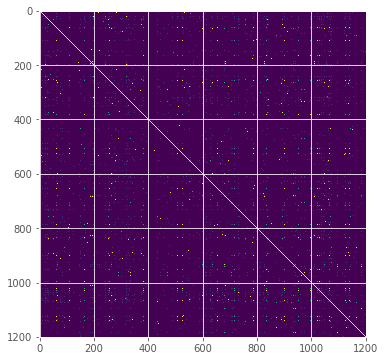

In [133]:
G = string_rbf_kernel(X_train, X_train)
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [136]:
from sklearn.metrics import accuracy_score

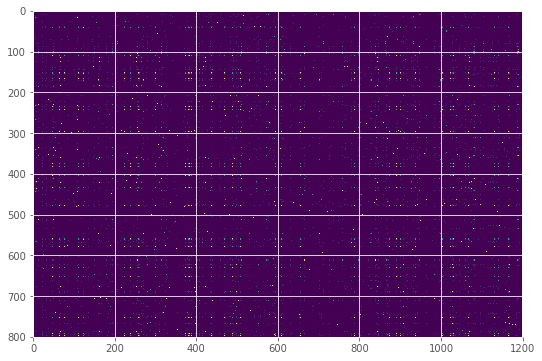

In [135]:
G_total = string_rbf_kernel(X_test, X_train)
plt.imshow(G_total)

In [137]:
N = 100

scores = np.empty((N, 2))
C = np.logspace(-2, 3, N)

for i, c in enumerate(C):
    model = SVC(C=c, kernel='precomputed')
    model.fit(G, y_train)
    scores[i, 0] = accuracy_score(y_train, model.predict(G))
    scores[i, 1] = accuracy_score(y_test, model.predict(G_total))

In [138]:
scores[np.argsort(scores[:, 1])[-5:], 1]

array([ 0.8325,  0.8325,  0.8325,  0.8325,  0.84  ])

In [139]:
np.percentile(scores[:, 1], 75)

0.82750000000000001

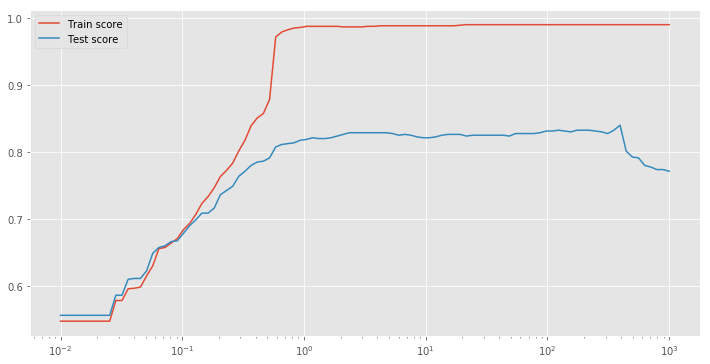

In [140]:
plt.plot(C, scores[:, 0], label='Train score')
plt.plot(C, scores[:, 1], label='Test score')
plt.xscale('log')
plt.legend()